# STAT 538 HW1Ming-Chun Wu 1724945

## Problem 1

Iteration 1
Label [1 0 1 1 0 0]
Centroid
[[ 3.66666667  1.66666667]
 [ 2.          3.        ]]
Iteration 2
Label [1 1 1 0 0 0]
Centroid
[[ 5.          1.        ]
 [ 0.66666667  3.66666667]]
Iteration 3
Label [1 1 1 0 0 0]
Centroid
[[ 5.          1.        ]
 [ 0.66666667  3.66666667]]


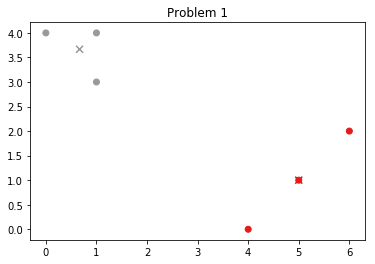

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

Data1 = np.array( [ [1,4],[1,3],[0,4],[5,1],[6,2],[4,0] ]  )


# (b) randomly initialize label
label = np.asarray( [0,0,0,0,0,0] )
label[ np.random.choice(range(6),3,False)  ] = 1
centroid = np.empty([2,2])


# (c)(d)(e) KMeans
error = np.Inf
iteration = 0
while True:
    iteration += 1
    centroid[0] = np.mean( Data1[ label == 0, : ], axis = 0 )
    centroid[1] = np.mean( Data1[ label == 1, : ], axis = 0 )
    
    print("Iteration", iteration)
    print("Label",label)
    print("Centroid")
    print(centroid)
    
    error_new = 0
    for i in range(6):
        d0 = np.linalg.norm( centroid[0] - Data1[i,:] )
        d1 = np.linalg.norm( centroid[1] - Data1[i,:] )
        if d0<=d1:
            label[i] = 0
        else:
            label[i] = 1
        
        error_new += np.linalg.norm( Data1[i,:] - centroid[ label[i] ]   )**2
    
    if error == error_new:
        break
    else:
        error = error_new
        
    print("==========")

# (a)(f) visualization
plt.scatter( Data1[:,0], Data1[:,1], c = label, cmap = 'Set1')
plt.scatter( centroid[:,0], centroid[:,1], c = [0,1], s = 50, marker = 'x' , cmap = 'Set1')
plt.title('Problem 1')
plt.show()

## Problem 2










Assume we label the eight shoppers as 1,2,...8 (from left to right)
1. Left figure: in this case, socks has higher effect on similarity, so I expect the clusters are assigned based on the number of socks. On cluster corresponds to shoppers with high numbers of socks, and the other cluster corresponds to shoppers that only purchased small numbers of socks. So the clusters might be {1,2,3,7,8} and {5,6}

2. Middle figure: In this case, we need both consider the effects of socks and computer. I would expect that {1,2,3,4} and {5,6,7,8} are the two clusters, since {5,6,7,8} all purchased the same amount of computers and similar amounts of socks.

3. Right figure: We only need to account for the feature "computer", so the clusters should be {1,2,3,4} and {5,6,7,8}.


## Problem 3

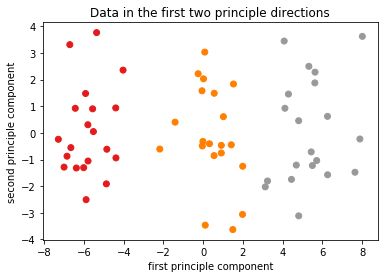

In [11]:
# (a)generate data
n = 20
p = 50

m1 = np.ones([n,p])
X1 = np.random.normal(0,1,[n,p])
X1 = X1 + m1

X2 = np.random.normal(0,1,[n,p])

X3 = np.random.normal(0,1,[n,p])
m3 = np.zeros([n,p])
m3[:,1:25] = -1
X3 += m3
X = np.vstack( [X1,X2,X3] )
label = np.repeat( [1,2,3] , 20)


# (b) pca
pca = PCA(2)
X_low = pca.fit_transform(X)

plt.scatter(X_low[:,0], X_low[:,1], c = label, cmap = 'Set1')
plt.xlabel('first principle component')
plt.ylabel('second principle component')
plt.title('Data in the first two principle directions')
plt.show()

In [12]:
# KMeans
# (c) K = 3
km3 = KMeans(3)
km3.fit(X)
label_km3 = km3.labels_ 
print('True Label', label)
print('KMeans    ', label_km3)

# Comment: Only two mis-cluster error

True Label [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
KMeans     [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1]


In [13]:
# (d) K = 2
km2 = KMeans(2)
km2.fit(X)
label_km2 = km2.labels_ 
print('True Label', label)
print('KMeans    ', label_km2)

# Comment: Roughly speaking, cluster 2 and cluster 3 are merged together by KMeans

True Label [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
KMeans     [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [14]:
# (e) K = 4
km4 = KMeans(4)
km4.fit(X)
label_km4 = km4.labels_ 
print('True Label', label)
print('KMeans    ', label_km4)

#Comment: Roughly speaking, cluster 2, the middle cluster (see Figure in part(b)), is seperated into two subgroups.

True Label [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
KMeans     [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 1 1 0 1 0 0 0 1 1 1 1 1 1 0 1
 1 1 1 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 1 3 3 3 3]


In [15]:
# (f) K = 3 on first 2 principle components
km3_pca = KMeans(3)
km3_pca.fit(X_low)
label_km3_pca = km3_pca.labels_ 
print('True Label', label)
print('KMeans    ', label_km3_pca)

# Comment: only two errors, which is identical with applying KMeans on the raw data.
# This means the first two principle components are good enough to present the raw data.

True Label [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
KMeans     [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [16]:
# (g) K = 3 after scaling
from sklearn.preprocessing import scale
X_scaled = scale( X, axis = 0, with_mean = False )

km3_scaled = KMeans(3)
km3_scaled.fit(X_scaled)
label_km3_scaled = km3_scaled.labels_ 
print('True Label', label)
print('KMeans    ', label_km3_scaled)

# Comment: Only two errors, the same as (c). Scaling does not effect the performance in this case.

True Label [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
KMeans     [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1]


## Problem 4

In [17]:
# define SOM
class SOM_2D(object):
    
    def __init__(self):
        self.Map = {}
        self.Error = []

    
       
    # train a map
    def train(self, X, q1, q2, n_iter, R):
        
        
        self.q1 = q1
        self.q2 = q2
        
        self.K = q1*q2
        self.n, self.p = X.shape
        
        # initialize Map with randomly selected observations
        selected = np.random.choice( range(self.n), self.K, False )
        index = 0
        for i in range(q1):
            for j in range(q2):
                
                self.Map[ (i+1,j+1) ] = X[ selected[ index ]  , : ]
                index += 1
                
        # training
        self.cluster_indicator = {}
        for iteration in range( n_iter ):
            r = R - (R-1)*iteration/n_iter
            alpha = ( n_iter - iteration )/n_iter
            
            i = iteration % self.n
            x = X[i, :]
            
            # find m
            l = self.find_l( x )
            self.cluster_indicator[ i ] = l # assign x to cluster l
            
            # update map
            for i in range(q1):
                for j in range(q2):
                    
                    d = np.sqrt( (l[0] - (i+1))**2 + (l[1]-(j+1))**2 )
                    if  d <= r :
                        self.Map[(i+1,j+1)] = self.Map[(i+1,j+1)] + alpha*( x - self.Map[(i+1,j+1)] )
            
            # update error
            if (iteration+1) % X.shape[0] == 0:
                self.Error.append( self.error(X) )


    # compute reconstruction error
    def error(self, X):
        error = 0
        for i in range( X.shape[0] ):
            l = self.cluster_indicator[i]
            m = self.Map[l]
            error += np.linalg.norm( X[i,:] - m  )**2
            
        return error
        
        

    # cluster X based on the trained map   
    def predict(self, X):
        predict = np.empty( [ X.shape[0] ,2] )
        for n in range( X.shape[0] ):
            l = self.find_l( X[n,] )
            predict[n,] = [ l[0], l[1] ]
            
        return predict
            
        
    
    
    def visualization(self, X, label):
        p = self.predict(X) + np.random.uniform( -0.1,0.1, [ X.shape[0] ,2] )
        
        plt.figure()
        plt.scatter( p[:,0], p[:,1], c = label, s=10, cmap = 'Set1')
        plt.title('Self-Organized Map')
        plt.show()
        
 


                       
    # find l that is closet to x
    def find_l(self, x):
    
        d_opt = np.Inf
        ans = (1,1)
        for i in range(self.q1):
            for j in range(self.q2):
                d = sum(  ( x  - self.Map[ (i+1,j+1) ] )**2  )
                if d < d_opt:
                    ans = (i+1, j+1)
                    d_opt = d
        return ans
                    
        

# simulated data    
def simu_data( theta, phi ):     
    x = np.sin(theta)*np.cos(phi)
    y = np.sin(theta)*np.sin(phi)
    z = np.cos(theta)
    ans = np.stack( (x,y,z), axis = 1)
    ans += np.random.normal( 0, 0.6, [ len(theta), 3 ] )
    return ans


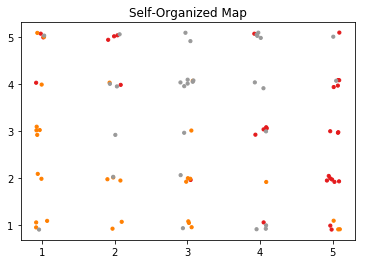

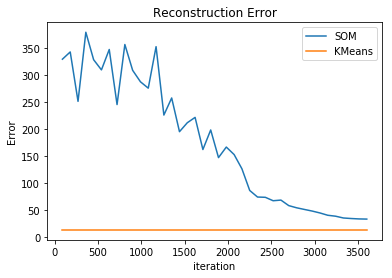

In [21]:
## main

# simulate data
n = 30

theta1 = np.random.uniform( -np.pi/8, np.pi/8, n)
phi1 = np.random.uniform(0, 2*np.pi, n)

theta2 = np.random.uniform( np.pi/4, 3*np.pi/4, n)
phi2 = np.random.uniform(-np.pi/4, np.pi/4, n)

theta3 = np.random.uniform( np.pi/4, 3*np.pi/4, n)
phi3 = np.random.uniform( np.pi/4, 3*np.pi/4, n)

theta = np.concatenate( (theta1, theta2, theta3), axis = 0 )
phi = np.concatenate( (phi1, phi2, phi3) )

X = simu_data( theta, phi ) # data
label = np.concatenate(  [ np.ones(n), 3*np.ones(n), 5*np.ones(n)  ] )  # color label


# SOM
n = X.shape[0]
n_iter = 3600
R = 2
q1 = 5
q2 = 5
som = SOM_2D()
som.train(X, q1, q2, n_iter, R)
som.visualization(X, label)


# KMeans
km = KMeans( 25 ).fit(X)
km_error = km.inertia_

# plots
plt.figure()
plt.plot( n*(np.arange(n_iter/n)+1), som.Error, label = 'SOM' )
plt.plot( n*(np.arange(n_iter/n)+1), km_error*np.ones( int(n_iter/n ) ), label = 'KMeans' )
plt.title('Reconstruction Error')
plt.xlabel('iteration')
plt.ylabel('Error')
plt.legend()
plt.show()

